In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [2]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [3]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

### Read the Data

In [4]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Cleaning and preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.columns=['target','text']

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isna().sum().sum()

0

In [12]:
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

In [16]:
le=LabelEncoder()

In [17]:
df['target']=le.fit_transform(df['target'])

In [18]:
#0: ham, 1: spam.

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [22]:
cat_counts=df['target'].value_counts()

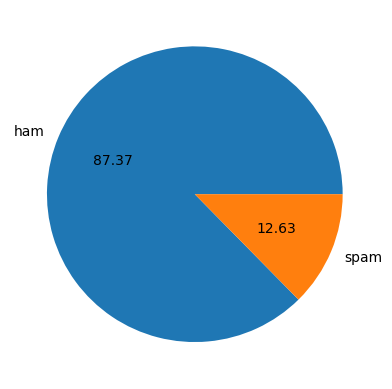

In [23]:
plt.pie(cat_counts,labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
df['num_chars']=df['text'].apply(len)

In [25]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df.describe()

,target,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [31]:
df[df['target']==0].describe()

,target,num_chars,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [32]:
df[df['target']==1].describe()

,target,num_chars,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

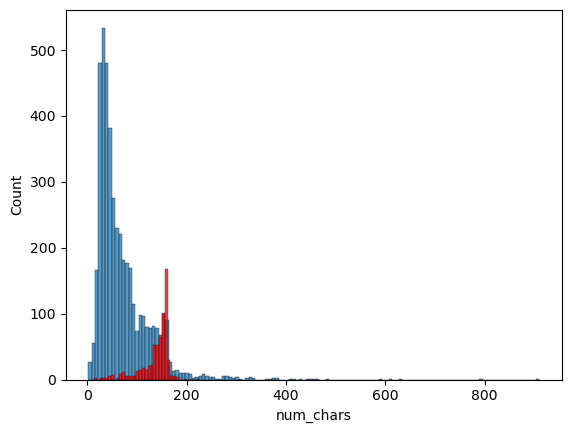

In [33]:
sns.histplot(df[df['target']==0]['num_chars'])
sns.histplot(df[df['target']==1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

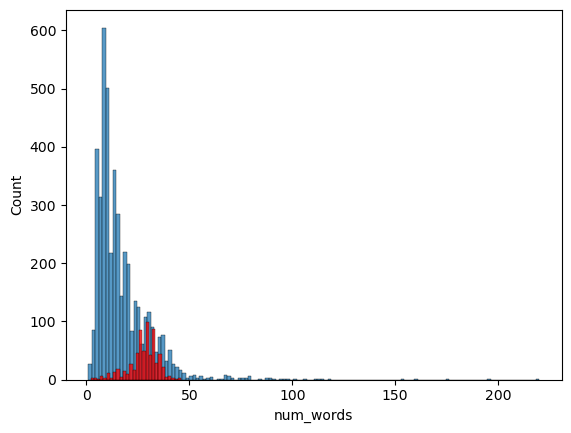

In [34]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

### Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [35]:
ps=PorterStemmer()

In [36]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for token in text:
        if token.isalnum():
            y.append(token)
            
    text=y[:]
    y.clear()
    
    for token in text:
        if token not in stopwords.words('english') and token not in string.punctuation:
            y.append(token)
            
    text=y[:]
    y.clear()
    
    for token in text:
        y.append(ps.stem(token))
        
    return y

In [37]:
transform_text("HELLO")

['hello']

In [38]:
df['transformed_text']=df['text'].apply(transform_text)

In [39]:
wc=WordCloud(width=800,height=400,background_color='white')

In [40]:
spam_texts=' '.join(df[df['target']==1]['transformed_text'].astype(str))

In [41]:
ham_texts=' '.join(df[df['target']==0]['transformed_text'].astype(str))

In [42]:
spam_wc=wc.generate(spam_texts)

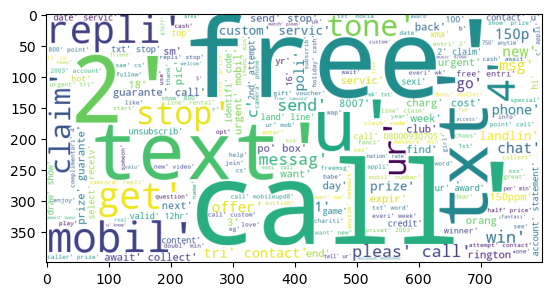

In [43]:
plt.imshow(spam_wc)
plt.show()

In [44]:
ham_wc=wc.generate(ham_texts)

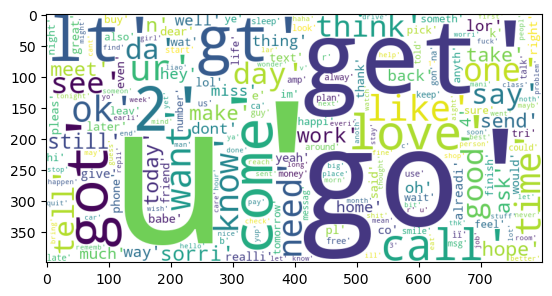

In [45]:
plt.imshow(ham_wc)
plt.show()

In [46]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text']:
    for word in msg:
        spam_corpus.append(word)

In [47]:
Counter(spam_corpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

In [48]:
top_spam=pd.DataFrame(Counter(spam_corpus).most_common(10))

In [49]:
top_spam.columns=['word','count']

In [50]:
top_spam.head()

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


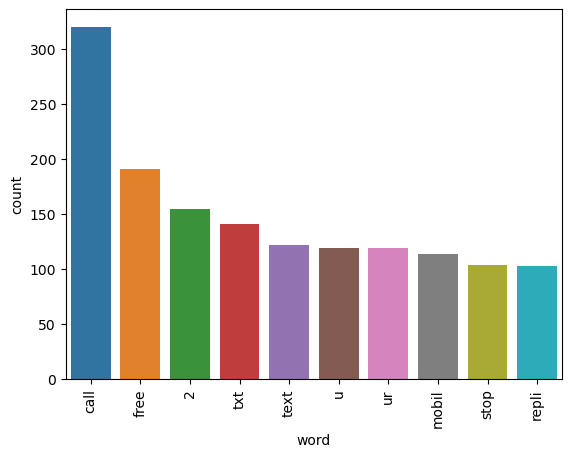

In [51]:
sns.barplot(x=top_spam['word'],y=top_spam['count'])
plt.xticks(rotation=90)
plt.show()

In [52]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text']:
    for word in msg:
        ham_corpus.append(word)

In [53]:
Counter(ham_corpus).most_common(10)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234)]

In [54]:
top_ham=pd.DataFrame(Counter(ham_corpus).most_common(10))

In [55]:
top_ham.columns=['word','count']

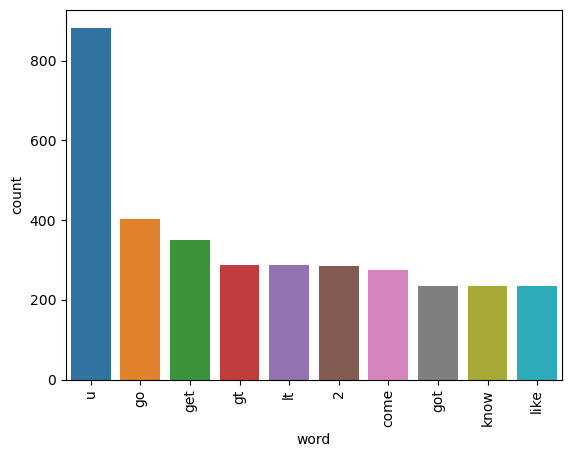

In [56]:
sns.barplot(x=top_ham['word'],y=top_ham['count'])
plt.xticks(rotation=90)
plt.show()

### Model Building

#### Feature Extraction using Bag Of Words

In [57]:
cv=CountVectorizer()

In [58]:
x=cv.fit_transform(df['transformed_text'].astype(str)).toarray()

In [59]:
y=df['target']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [61]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [62]:
models=[gnb,mnb,bnb]

In [63]:
for model in models:
    model.fit(x_train,y_train)

In [64]:
y_predg=gnb.predict(x_test)
y_predm=mnb.predict(x_test)
y_predb=bnb.predict(x_test)

In [65]:
print("accuracy for gaussian NB: ",accuracy_score(y_test,y_predg))
print("precision for gaussian NB: ",precision_score(y_test,y_predg))

accuracy for gaussian NB:  0.8733075435203095
precision for gaussian NB:  0.532


In [66]:
print("accuracy for multinomial NB : ",accuracy_score(y_test,y_predm))
print("precision for multinomial NB: ",precision_score(y_test,y_predm))

accuracy for multinomial NB :  0.9700193423597679
precision for multinomial NB:  0.881578947368421


In [67]:
print("accuracy for bernoulli NB: ",accuracy_score(y_test,y_predb))
print("precision for bernoulli NB: ",precision_score(y_test,y_predb))

accuracy for bernoulli NB:  0.9671179883945842
precision for bernoulli NB:  0.991304347826087


### Feature Extraction using Tf-Idf Vectorizer

In [68]:
tfidf=TfidfVectorizer(max_features=3000)

In [69]:
x=tfidf.fit_transform(df['transformed_text'].astype(str)).toarray()

In [70]:
y=df['target']

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [72]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [73]:
models=[gnb,mnb,bnb]

In [74]:
for model in models:
    model.fit(x_train,y_train)

In [75]:
y_predg=gnb.predict(x_test)
y_predm=mnb.predict(x_test)
y_predb=bnb.predict(x_test)

In [76]:
print("accuracy for gaussian NB: ",accuracy_score(y_test,y_predg))
print("precision for gaussian NB: ",precision_score(y_test,y_predg))

accuracy for gaussian NB:  0.8539651837524178
precision for gaussian NB:  0.47244094488188976


In [77]:
print("accuracy for multinomial NB : ",accuracy_score(y_test,y_predm))
print("precision for multinomial NB: ",precision_score(y_test,y_predm))

accuracy for multinomial NB :  0.9729206963249516
precision for multinomial NB:  1.0


In [78]:
print("accuracy for bernoulli NB: ",accuracy_score(y_test,y_predb))
print("precision for bernoulli NB: ",precision_score(y_test,y_predb))

accuracy for bernoulli NB:  0.9738878143133463
precision for bernoulli NB:  0.9661016949152542


In [79]:
### Using the model trained for feature extraction using tfidf and multinomial nb...

### Deploying

In [80]:
import pickle

In [81]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))